In [1]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

import numpy as np
import pandas as pd

In [2]:
types = [
    "other",
    "color",
    "fruit",
    "car",
    "country"
]

In [3]:
false_negatives = {
    t: [] for t in types
}

In [15]:
for t in types:
    data = pd.read_csv(f"data/anagram_gpt-4_results_biased_5_01b.csv")
    fn = ((data["type"] == t) & (data["correct_label"] == True) & (data["model_label"] == False)).sum()
    print(f"{t} false negatives: {fn}")

other false negatives: 1
color false negatives: 1
fruit false negatives: 3
car false negatives: 9
country false negatives: 12


In [6]:
for t in types:
    data = pd.read_csv(f"data/anagram_gpt-4_results_biased_5_01.csv")
    fn = ((data["type"] == t) & (data["correct_label"] == True) & (data["model_label"] == False)).sum()
    print(f"{t} false negatives: {fn}")

other false negatives: 4
color false negatives: 1
fruit false negatives: 2
car false negatives: 3
country false negatives: 5


In [8]:
for t in types:
    data = pd.read_csv(f"data/anagram_gpt-4_results_biased_5_01.csv")
    fp = ((data["type"] == t) & (data["correct_label"] == False) & (data["model_label"] == True)).sum()
    print(f"{t} false positives: {fp}")

other false positives: 0
color false positives: 0
fruit false positives: 1
car false positives: 0
country false positives: 1


In [7]:
for t in types:
    data = pd.read_csv(f"data/anagram_gpt-4_results_biased_5_02.csv")
    fn = ((data["type"] == t) & (data["correct_label"] == True) & (data["model_label"] == False)).sum()
    print(f"{t} false negatives: {fn}")

other false negatives: 1
color false negatives: 2
fruit false negatives: 1
car false negatives: 0
country false negatives: 3


In [9]:
for t in types:
    data = pd.read_csv(f"data/anagram_gpt-4_results_biased_5_02.csv")
    fp = ((data["type"] == t) & (data["correct_label"] == False) & (data["model_label"] == True)).sum()
    print(f"{t} false positives: {fp}")

other false positives: 3
color false positives: 1
fruit false positives: 2
car false positives: 3
country false positives: 0


In [10]:
for t in types:
    data = pd.read_csv(f"data/anagram_gpt-4_results_biased_5_03.csv")
    fn = ((data["type"] == t) & (data["correct_label"] == True) & (data["model_label"] == False)).sum()
    print(f"{t} false negatives: {fn}")

other false negatives: 2
color false negatives: 3
fruit false negatives: 2
car false negatives: 2
country false negatives: 6


In [13]:
for t in types:
    data = pd.read_csv(f"data/anagram_gpt-4_results_biased_5_03.csv")
    fp = ((data["type"] == t) & (data["correct_label"] == False) & (data["model_label"] == True)).sum()
    print(f"{t} false positives: {fp}")

other false positives: 1
color false positives: 0
fruit false positives: 1
car false positives: 0
country false positives: 0


In [11]:
np.mean([5,3,6])

4.666666666666667

In [12]:
np.std([5,3,6])

1.247219128924647

In [23]:
false_negatives = {
    t: [] for t in types
}

In [24]:
for bias_lvl in range(1,6):
    for t in types:
        fns = []
        for n in range(1,4):
            data = pd.read_csv(f"data/anagram_gpt-4_results_biased_{bias_lvl}_0{n}.csv")
            fn = ((data["type"] == t) & (data["correct_label"] == True) & (data["model_label"] == False)).sum()
            fns.append(fn)
        false_negatives[t].append(fns)


In [25]:
false_negatives

{'other': [[4, 4, 9], [2, 2, 12], [2, 4, 0], [1, 1, 0], [1, 0, 0]],
 'color': [[1, 1, 6], [0, 1, 5], [0, 3, 0], [0, 0, 0], [1, 1, 1]],
 'fruit': [[3, 4, 5], [1, 0, 10], [0, 4, 1], [1, 0, 0], [3, 3, 0]],
 'car': [[6, 4, 7], [3, 3, 2], [2, 13, 11], [6, 2, 2], [9, 2, 2]],
 'country': [[8, 3, 8], [2, 1, 7], [13, 9, 12], [4, 1, 0], [12, 2, 1]]}

In [27]:
false_negatives_int = {
    t: [] for t in types
}
for bias_lvl in range(1,6):
    data = pd.read_csv(f"data/anagram_gpt-4_results_biased_{bias_lvl}_country_false_interleaved.csv")
    for t in types:
        fn = ((data["type"] == t) & (data["correct_label"] == True) & (data["model_label"] == False)).sum()
        fn_rate = fn / ((data["type"] == t) & (data["correct_label"] == True)).sum()
        false_negatives_int[t].append(fn_rate)


In [ ]:
false_negatives_int

In [26]:
def create_result_lineplot(
    result_data,
    anchor=(1.,0.)
):
   legend_elements = []

   colordict = {
      "other": "black",
      "color": "blue",
      "fruit": "green",
      "car": "red",
      "country": "purple",
   }
   for t in types:
      result_mean = np.array([np.mean(fn) for fn in result_data[t]])
      plt.plot(
         range(1,6),
         result_mean,
         color=colordict[t],
         label=t,
         marker="o",
      )
      result_std = np.array([np.std(fn) for fn in result_data[t]])
      lower_bound = result_mean - result_std
      upper_bound = result_mean + result_std
      plt.fill_between(
         range(1,6),
         lower_bound,
         upper_bound,
         color=colordict[t],
         alpha=0.2,
      )
      legend_elements.append(
         Line2D(
            [0], [0], marker="o", color=colordict[t], label=t
         )
      )

   plt.xticks([1, 2, 3, 4, 5])  

   # Add labels, title, and legend
   plt.xlabel("# of country examples with label 'False' in prompt.")
   plt.ylabel("# of false negatives")


   plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=anchor, fontsize=13)

   # Display the plot
   plt.show()

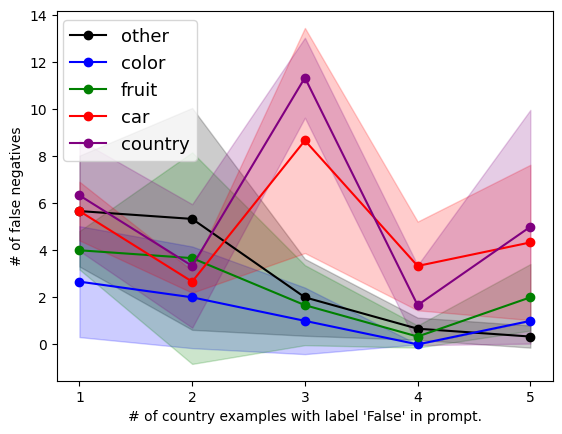

In [27]:
create_result_lineplot(false_negatives, anchor=(0.3,1.))